## B. `go.Scatter`

`-` 

In [20]:
fig = go.Figure()

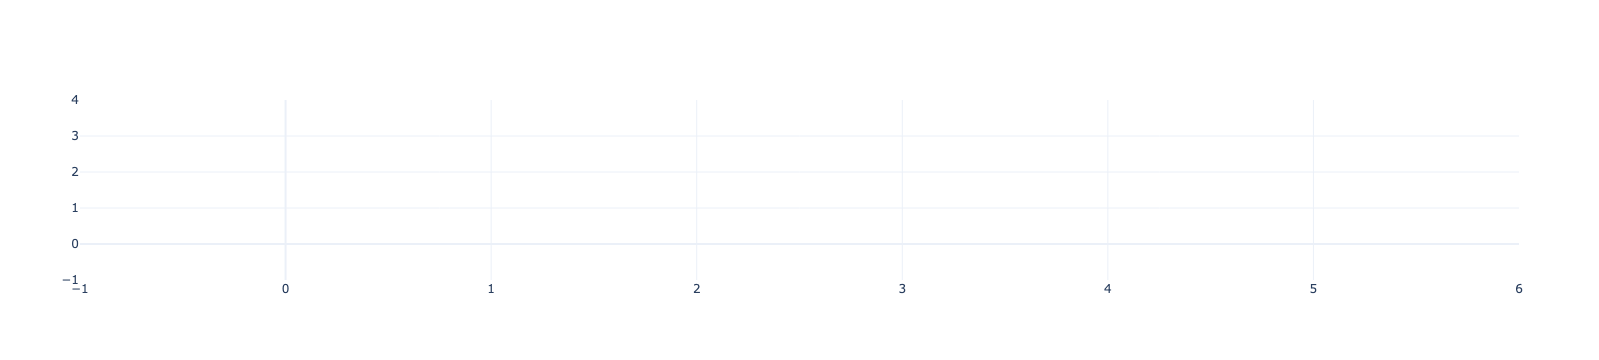

In [21]:
fig

In [22]:
# dict(x=[1,2,3],y=[2,3,4])
go_scatter1 = go.Scatter(x=[1,2,3],y=[2,3,4])
go_scatter2 = go.Scatter(x=[1,2,3],y=[2,3,-3])

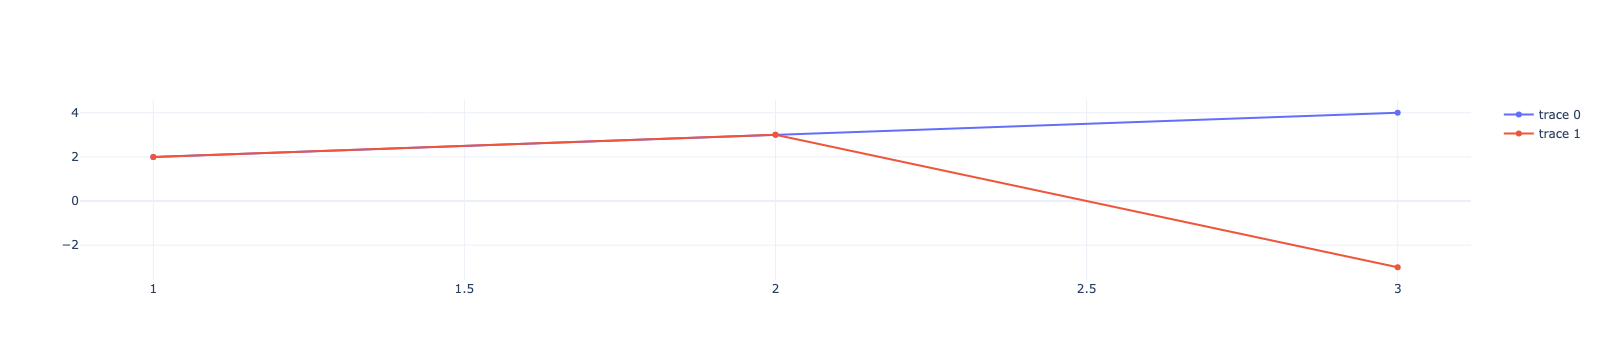

In [23]:
fig.add_trace(go_scatter1).add_trace(go_scatter2)

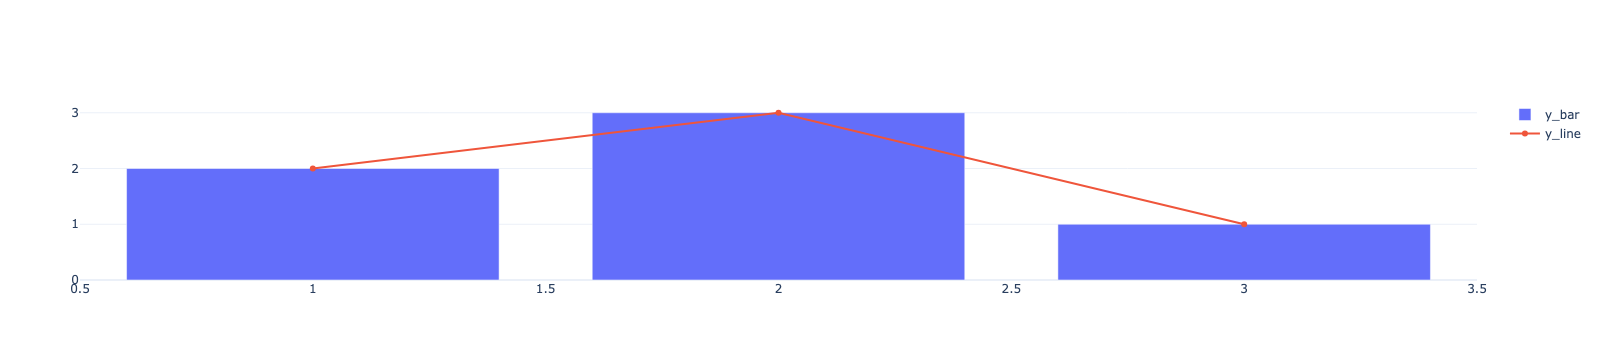

In [24]:
fig = go.Figure()
fig.add_bar(x=[1,2,3],y=[2,3,1])
fig.add_scatter(x=[1,2,3],y=[2,3,1])
fig.data[0]['name']='y_bar'
fig.data[1]['name']='y_line'
fig.data[0]['legendgroup']='y'
fig.data[1]['legendgroup']='y'
fig

`-` selector의 역할.. 너무 어려운뎅? (지정안하면 전체업데이트함)

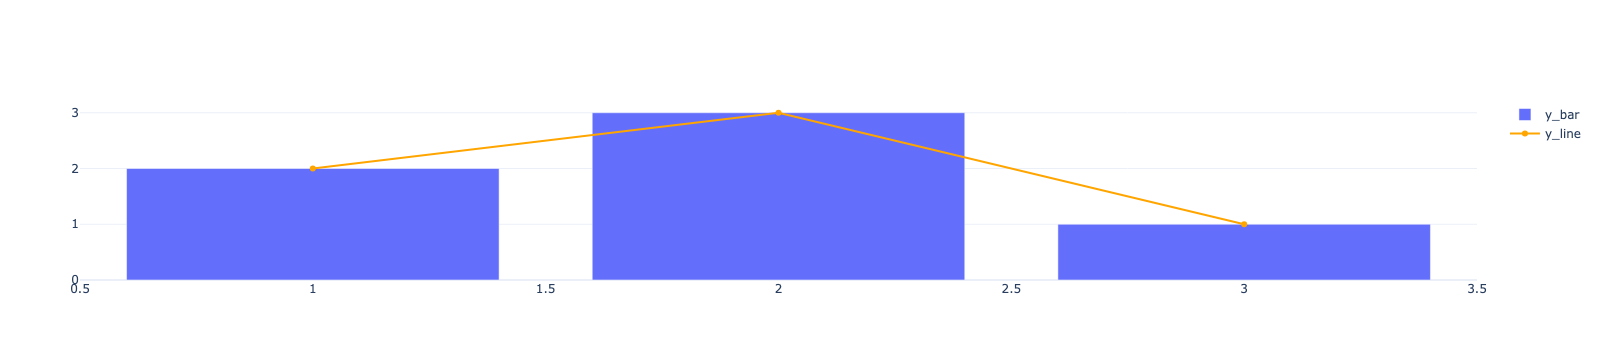

In [25]:
fig = go.Figure()
fig.add_bar(x=[1,2,3],y=[2,3,1],name='y_bar')
fig.add_scatter(x=[1,2,3],y=[2,3,1],name='y_line')
fig.update_traces(marker_color='orange',selector={'name':'y_line'})
fig

# `go.Scatter`

`-` 예시1

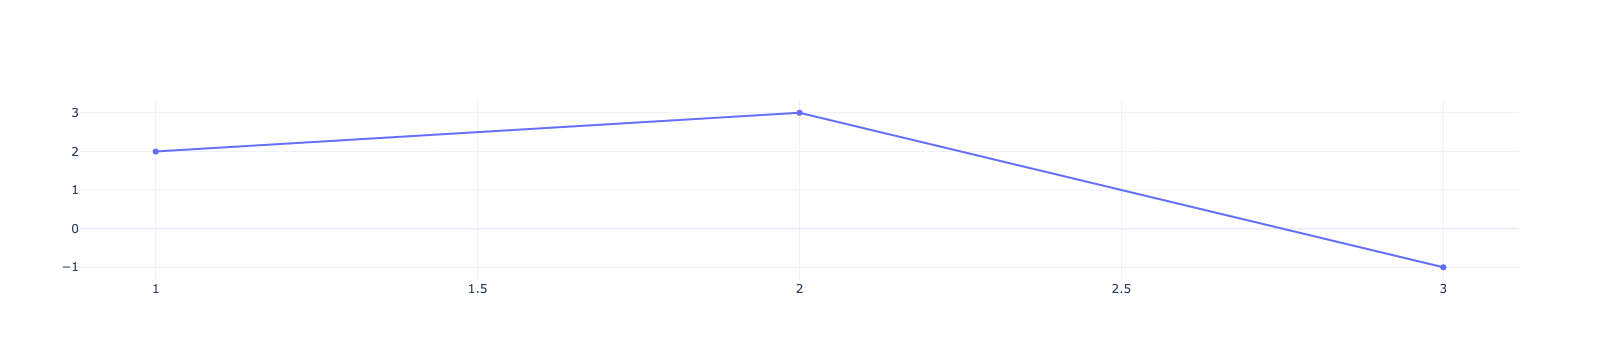

In [26]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1]
)
fig.add_trace(scatter)

`-` 예시2

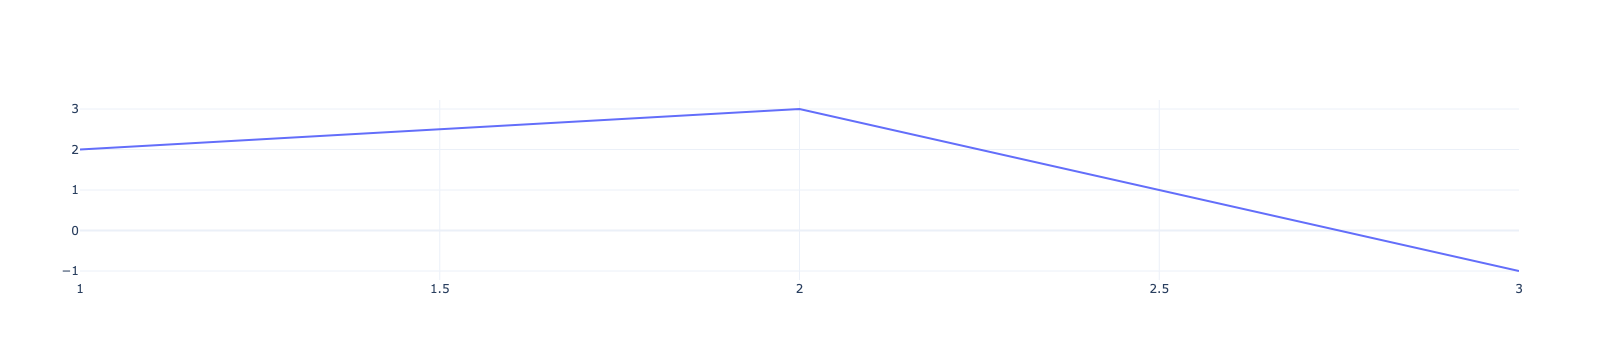

In [27]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines'
)
fig.add_trace(scatter)

`-` 예시3

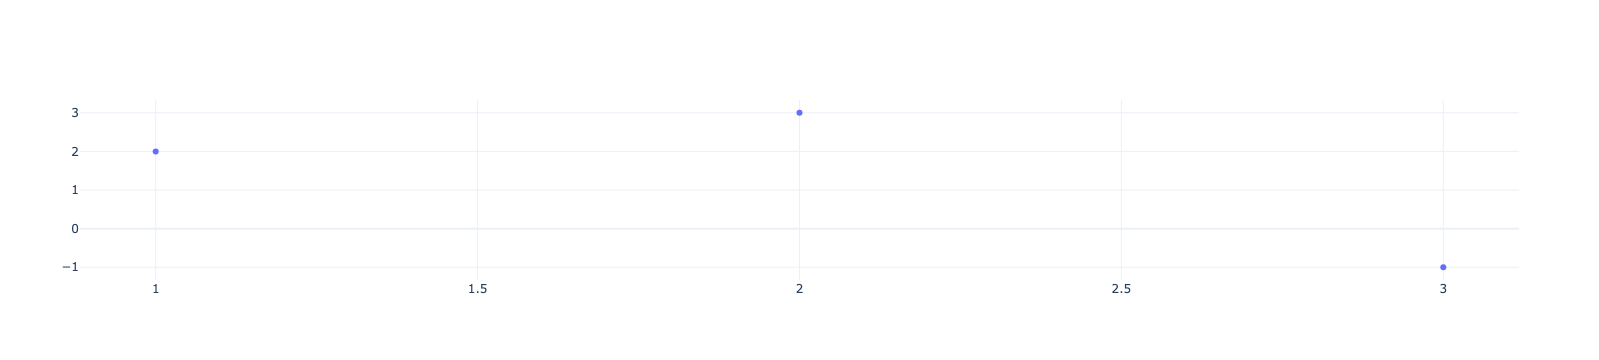

In [28]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='markers'
)
fig.add_trace(scatter)

`-` 예시4

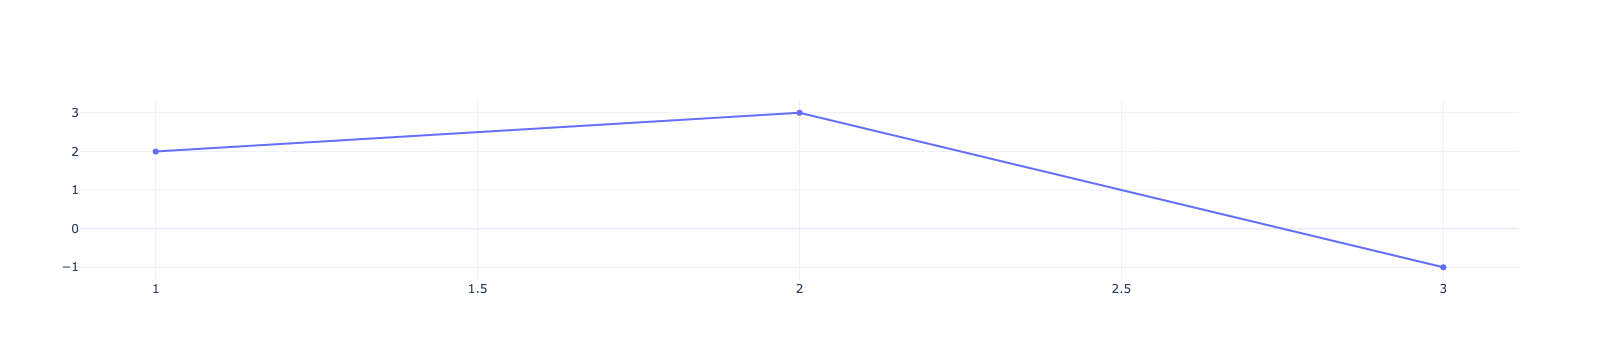

In [29]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers'
)
fig.add_trace(scatter)

`-` 예시5

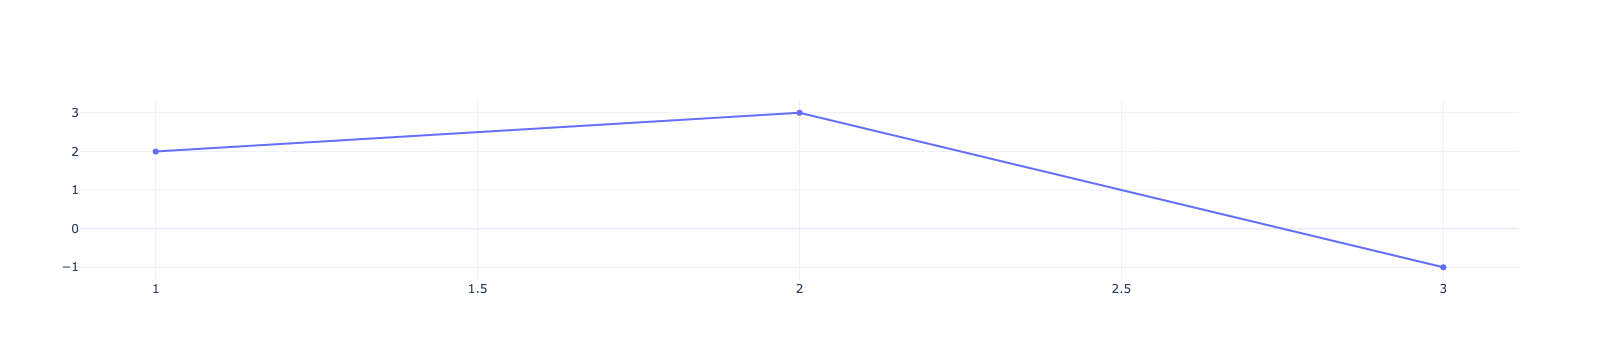

In [30]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers',
    name='test'
)
fig.add_trace(scatter)

`-` 예시6

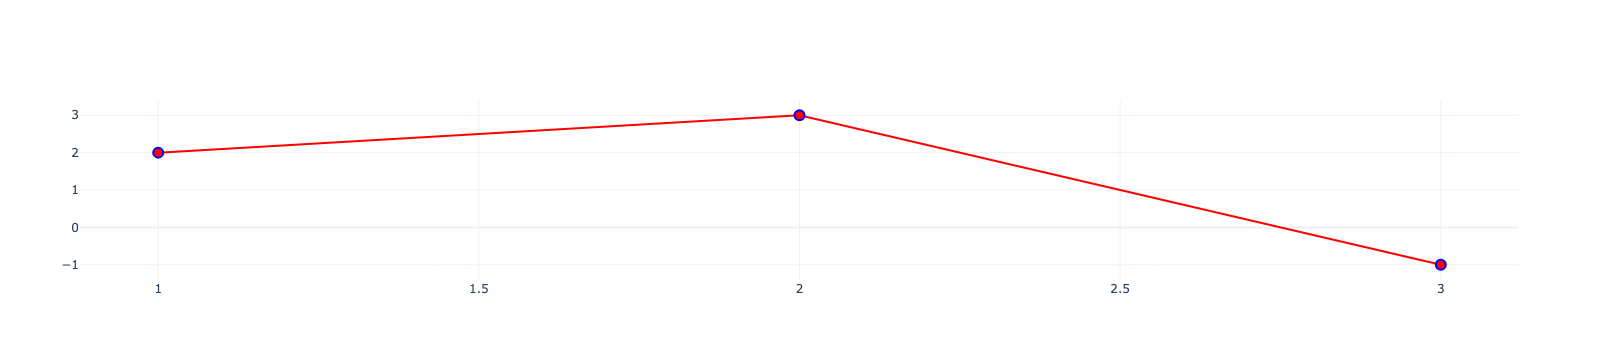

In [31]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers',
    name='test',
    marker={'color':'red','size':10,'symbol':'circle','line':{'width':2,'color':'blue'}}
)
fig.add_trace(scatter)

In [34]:
fig.data

(Scatter({
     'marker': {'color': 'red', 'line': {'color': 'blue', 'width': 2}, 'size': 10, 'symbol': 'circle'},
     'mode': 'lines+markers',
     'name': 'test',
     'x': [1, 2, 3],
     'y': [2, 3, -1]
 }),)

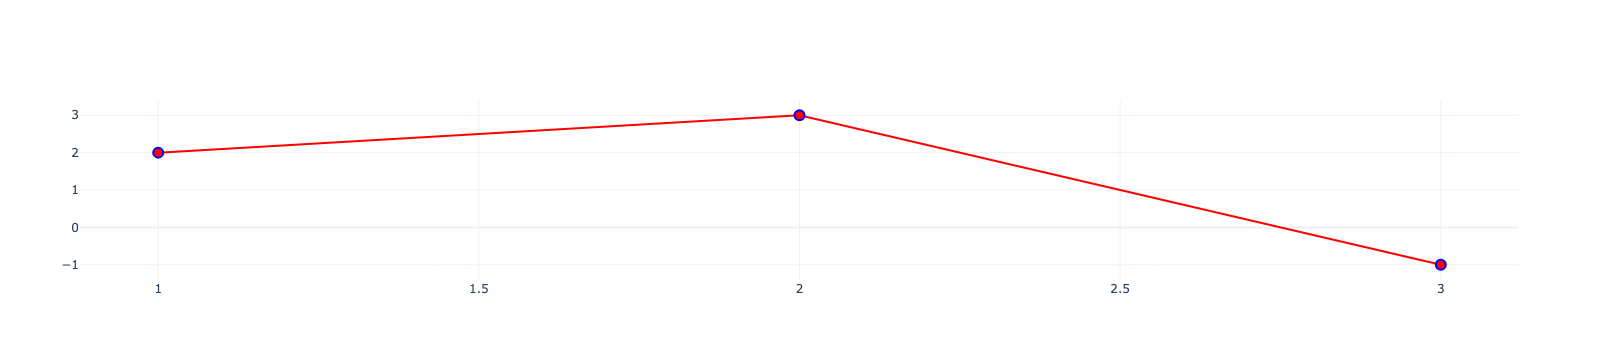

In [39]:
fig = go.Figure()
scatter = go.Scatter(
    {
     'marker': {'color': 'red', 'line': {'color': 'blue', 'width': 2}, 'size': 10, 'symbol': 'circle'},
     'mode': 'lines+markers',
     'name': 'test',
     'x': [1, 2, 3],
     'y': [2, 3, -1]
 }  
)
fig.add_trace(scatter)

`-` 예시7

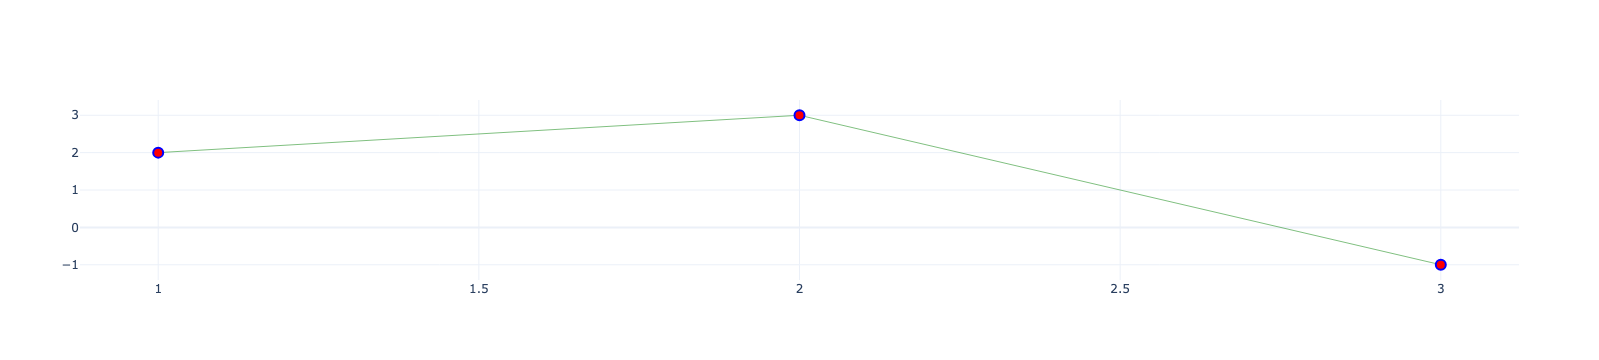

In [588]:
fig = go.Figure()
scatter = go.Scatter(
    x=[1,2,3],y=[2,3,-1],
    mode='lines+markers',
    name='test',
    marker={'color':'red','size':10,'symbol':'circle','line':{'width':2,'color':'blue'}},
    line={'width':0.5,'color':'green'}
)
fig.add_trace(scatter)

`-` 색상변경 

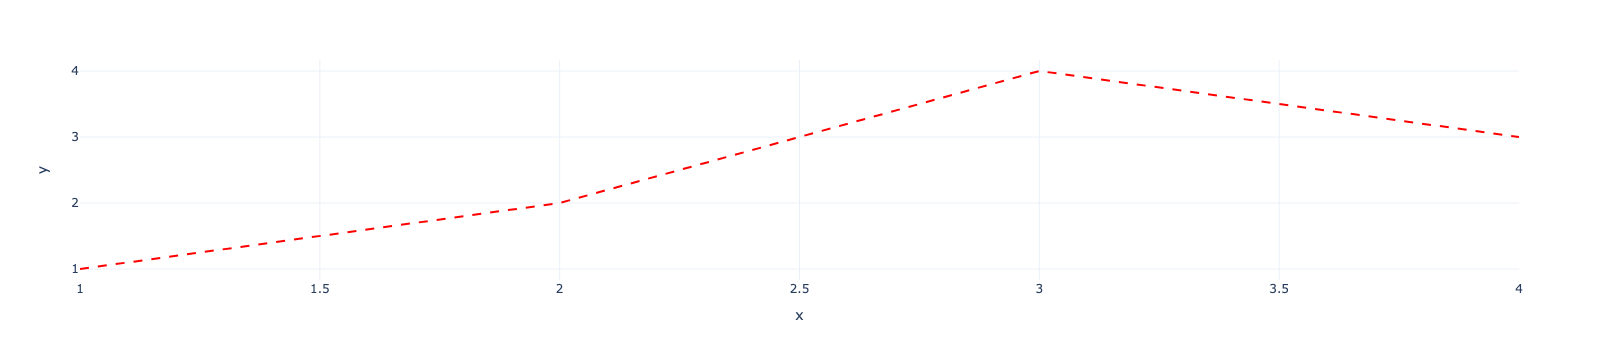

In [546]:
fig = pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',
)
fig.update_traces(
    line_color = 'red',
    line_dash= 'dash'
)

`-` 색상변경2

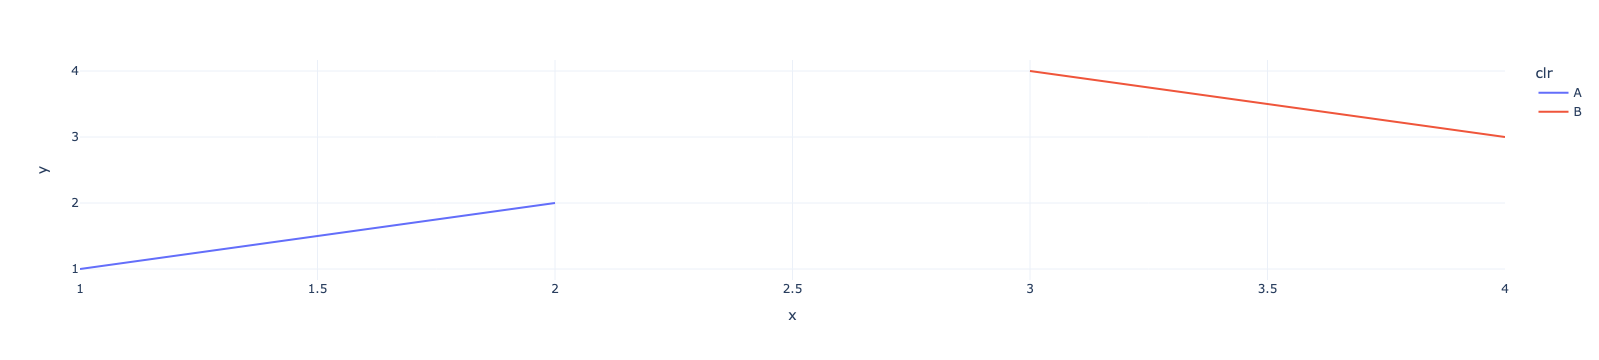

In [509]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr'
)

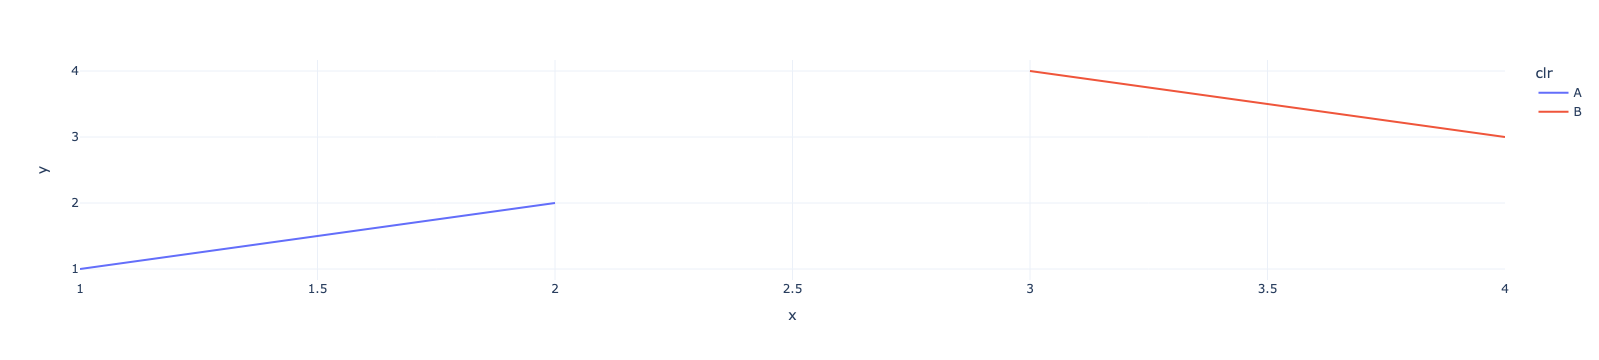

In [510]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr'
)

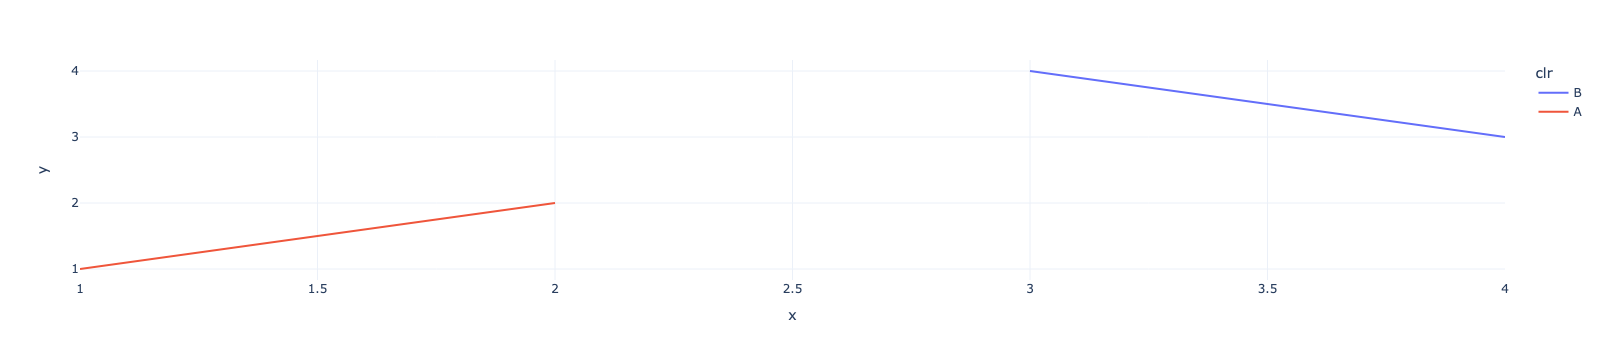

In [519]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    category_orders= {'clr':['B','A']}
)

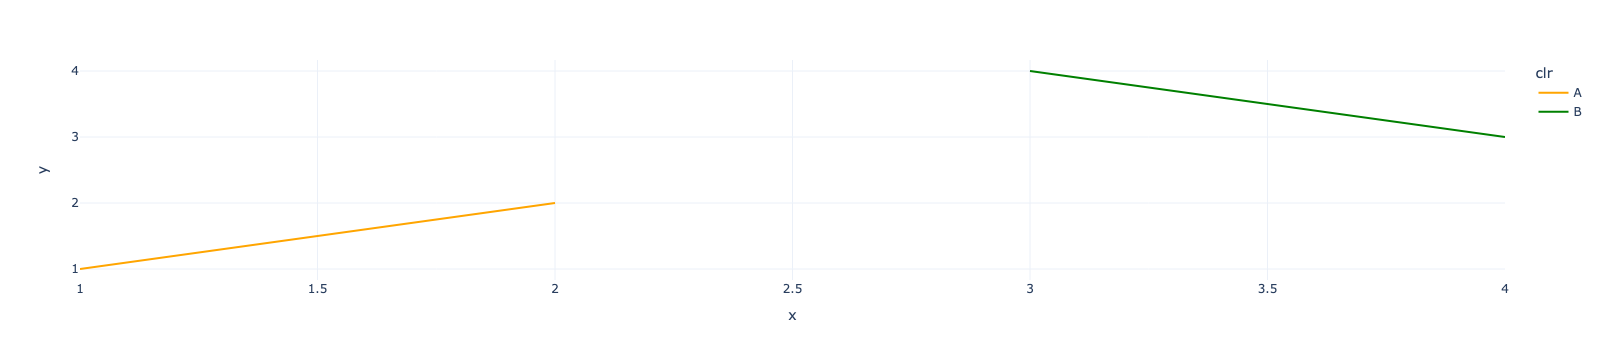

In [531]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_sequence = ['orange','green'],
    
)

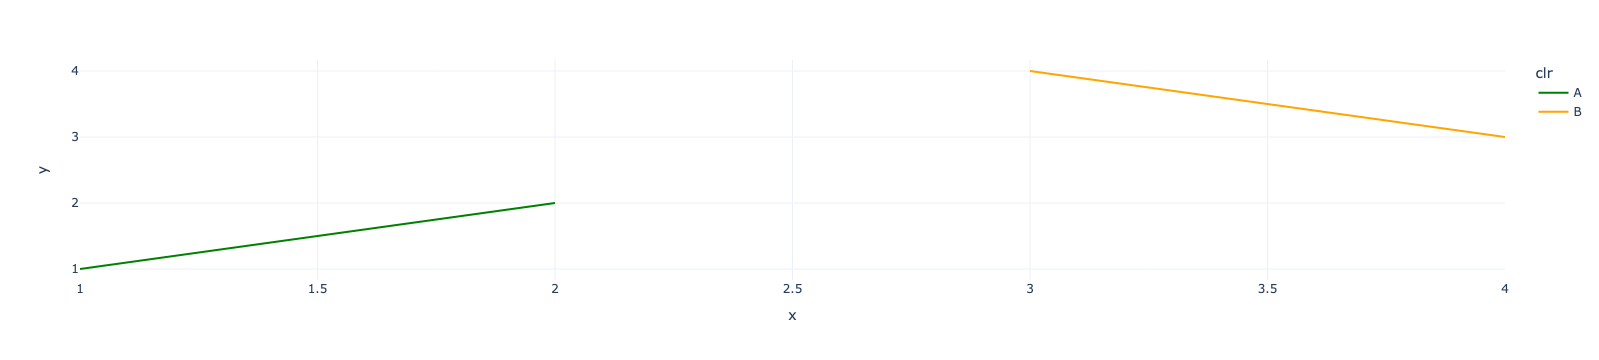

In [532]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_map = {'B':'orange','A':'green'},
)

`-` 라인의 타입변경 

`-` dot-connected plot

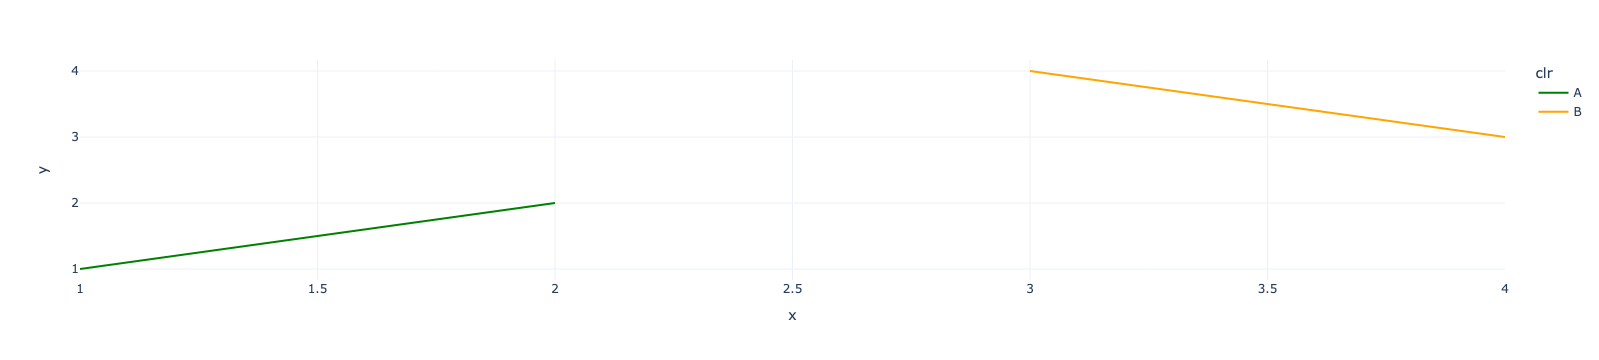

In [520]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_map = {'B':'orange','A':'green'}
)

In [ ]:
pd.DataFrame({'x':[1,2,3,4],'y':[1,2,4,3],'clr':['A','A','B','B']})\
.plot.line(
    x='x',y='y',color='clr',
    color_discrete_map = {'B':'orange','A':'green'}
)

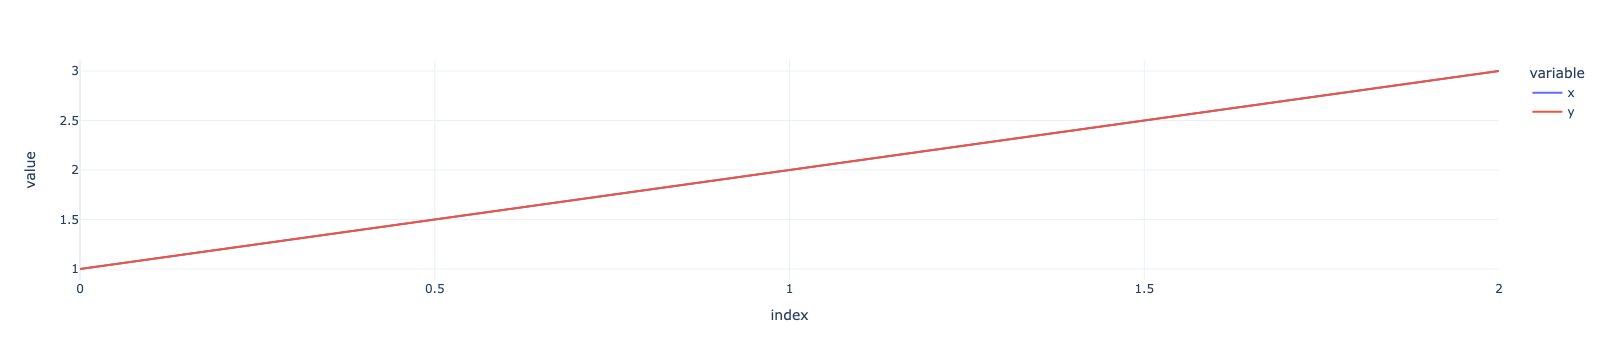

In [483]:
_fig

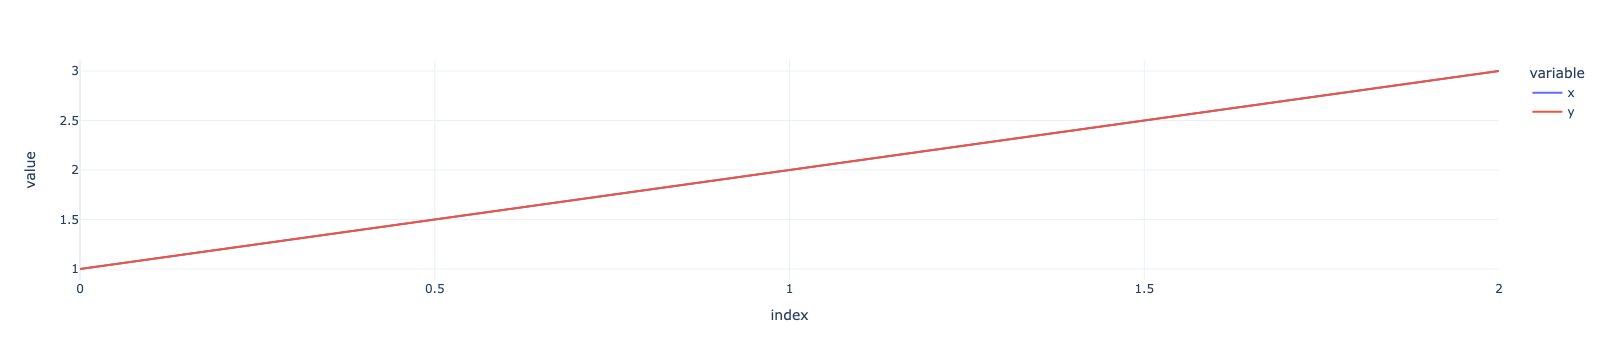

In [484]:
go.Figure().add_trace(_fig.data[0]).add_trace(_fig.data[1]).update_layout(_fig.layout)

In [490]:
_fig.layout['legend']['title']['text']='변수이름'

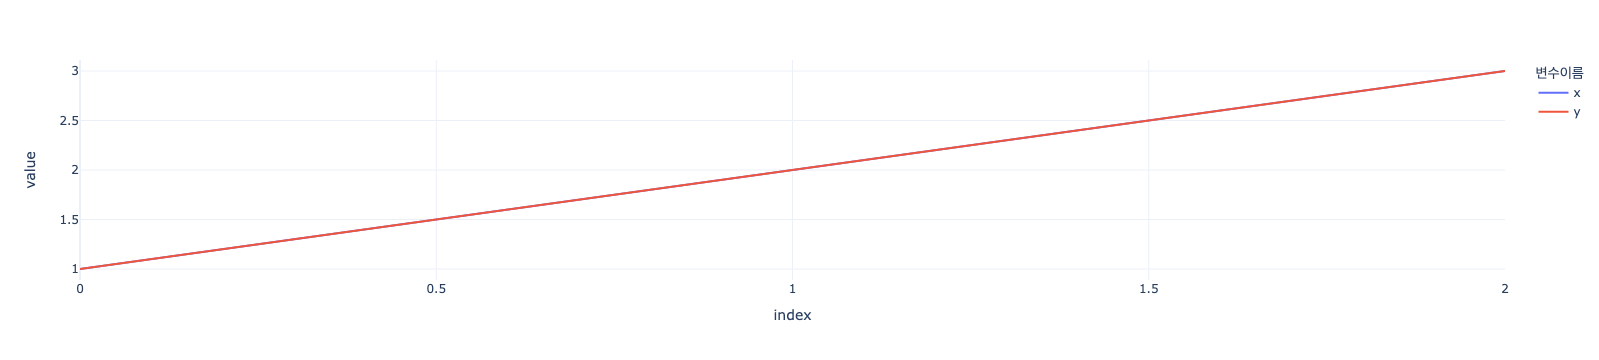

In [491]:
_fig